# Measure things inside things
This notebook shows an example of how to use the "Regionprops Measure Things Inside Things" module from napari-skimage-regionprops.

The goal is to measure properties from two labeled images produced from a multi-channel image and generate a table that, not only displays these properties, but also shows how properties from objects in a "target" channel relate to objects in a "reference" channel.

Thus, in this notebook we:
  - count how many objects from a DNA channel belong or are 'inside' an actin channel (cell bodies)
  - get the average area of DNA which are 'inside' each cell
  - get the average of intensity features of DNA which are 'inside' each cell

*This results in new features for the reference labels, some of which may display a odd looking name at first, like `mean_intensity average`. That's because `mean_intensity` is an intensity feature and `mean_intensity average` rpresents the average of this feature inside a cell/object.*

In [1]:
from skimage import io
import numpy as np
import pandas as pd
import napari
from napari.utils import nbscreenshot
# from napari_skimage_regionprops import x
from napari_skimage_regionprops import regionprops_measure_things_inside_things

## Open images in napari

In this small example, we open two cropped images from the [BBBC007 dataset](https://bbbc.broadinstitute.org/BBBC007), and two label images generated from the intensity images.

Thus, we have two intensity images (a multichannel image) and two labels images. The cell labels are shown as contours and the DNA labels are shown as filled regions for better differentiation.

In [2]:
image_channel1 = io.imread('../data/actin.tif')
image_channel2 = io.imread('../data/dna.tif')
cell_labels = io.imread('../data/cell_labels.tif')
dna_labels = io.imread('../data/dna_labels.tif')

In [3]:
viewer = napari.Viewer()

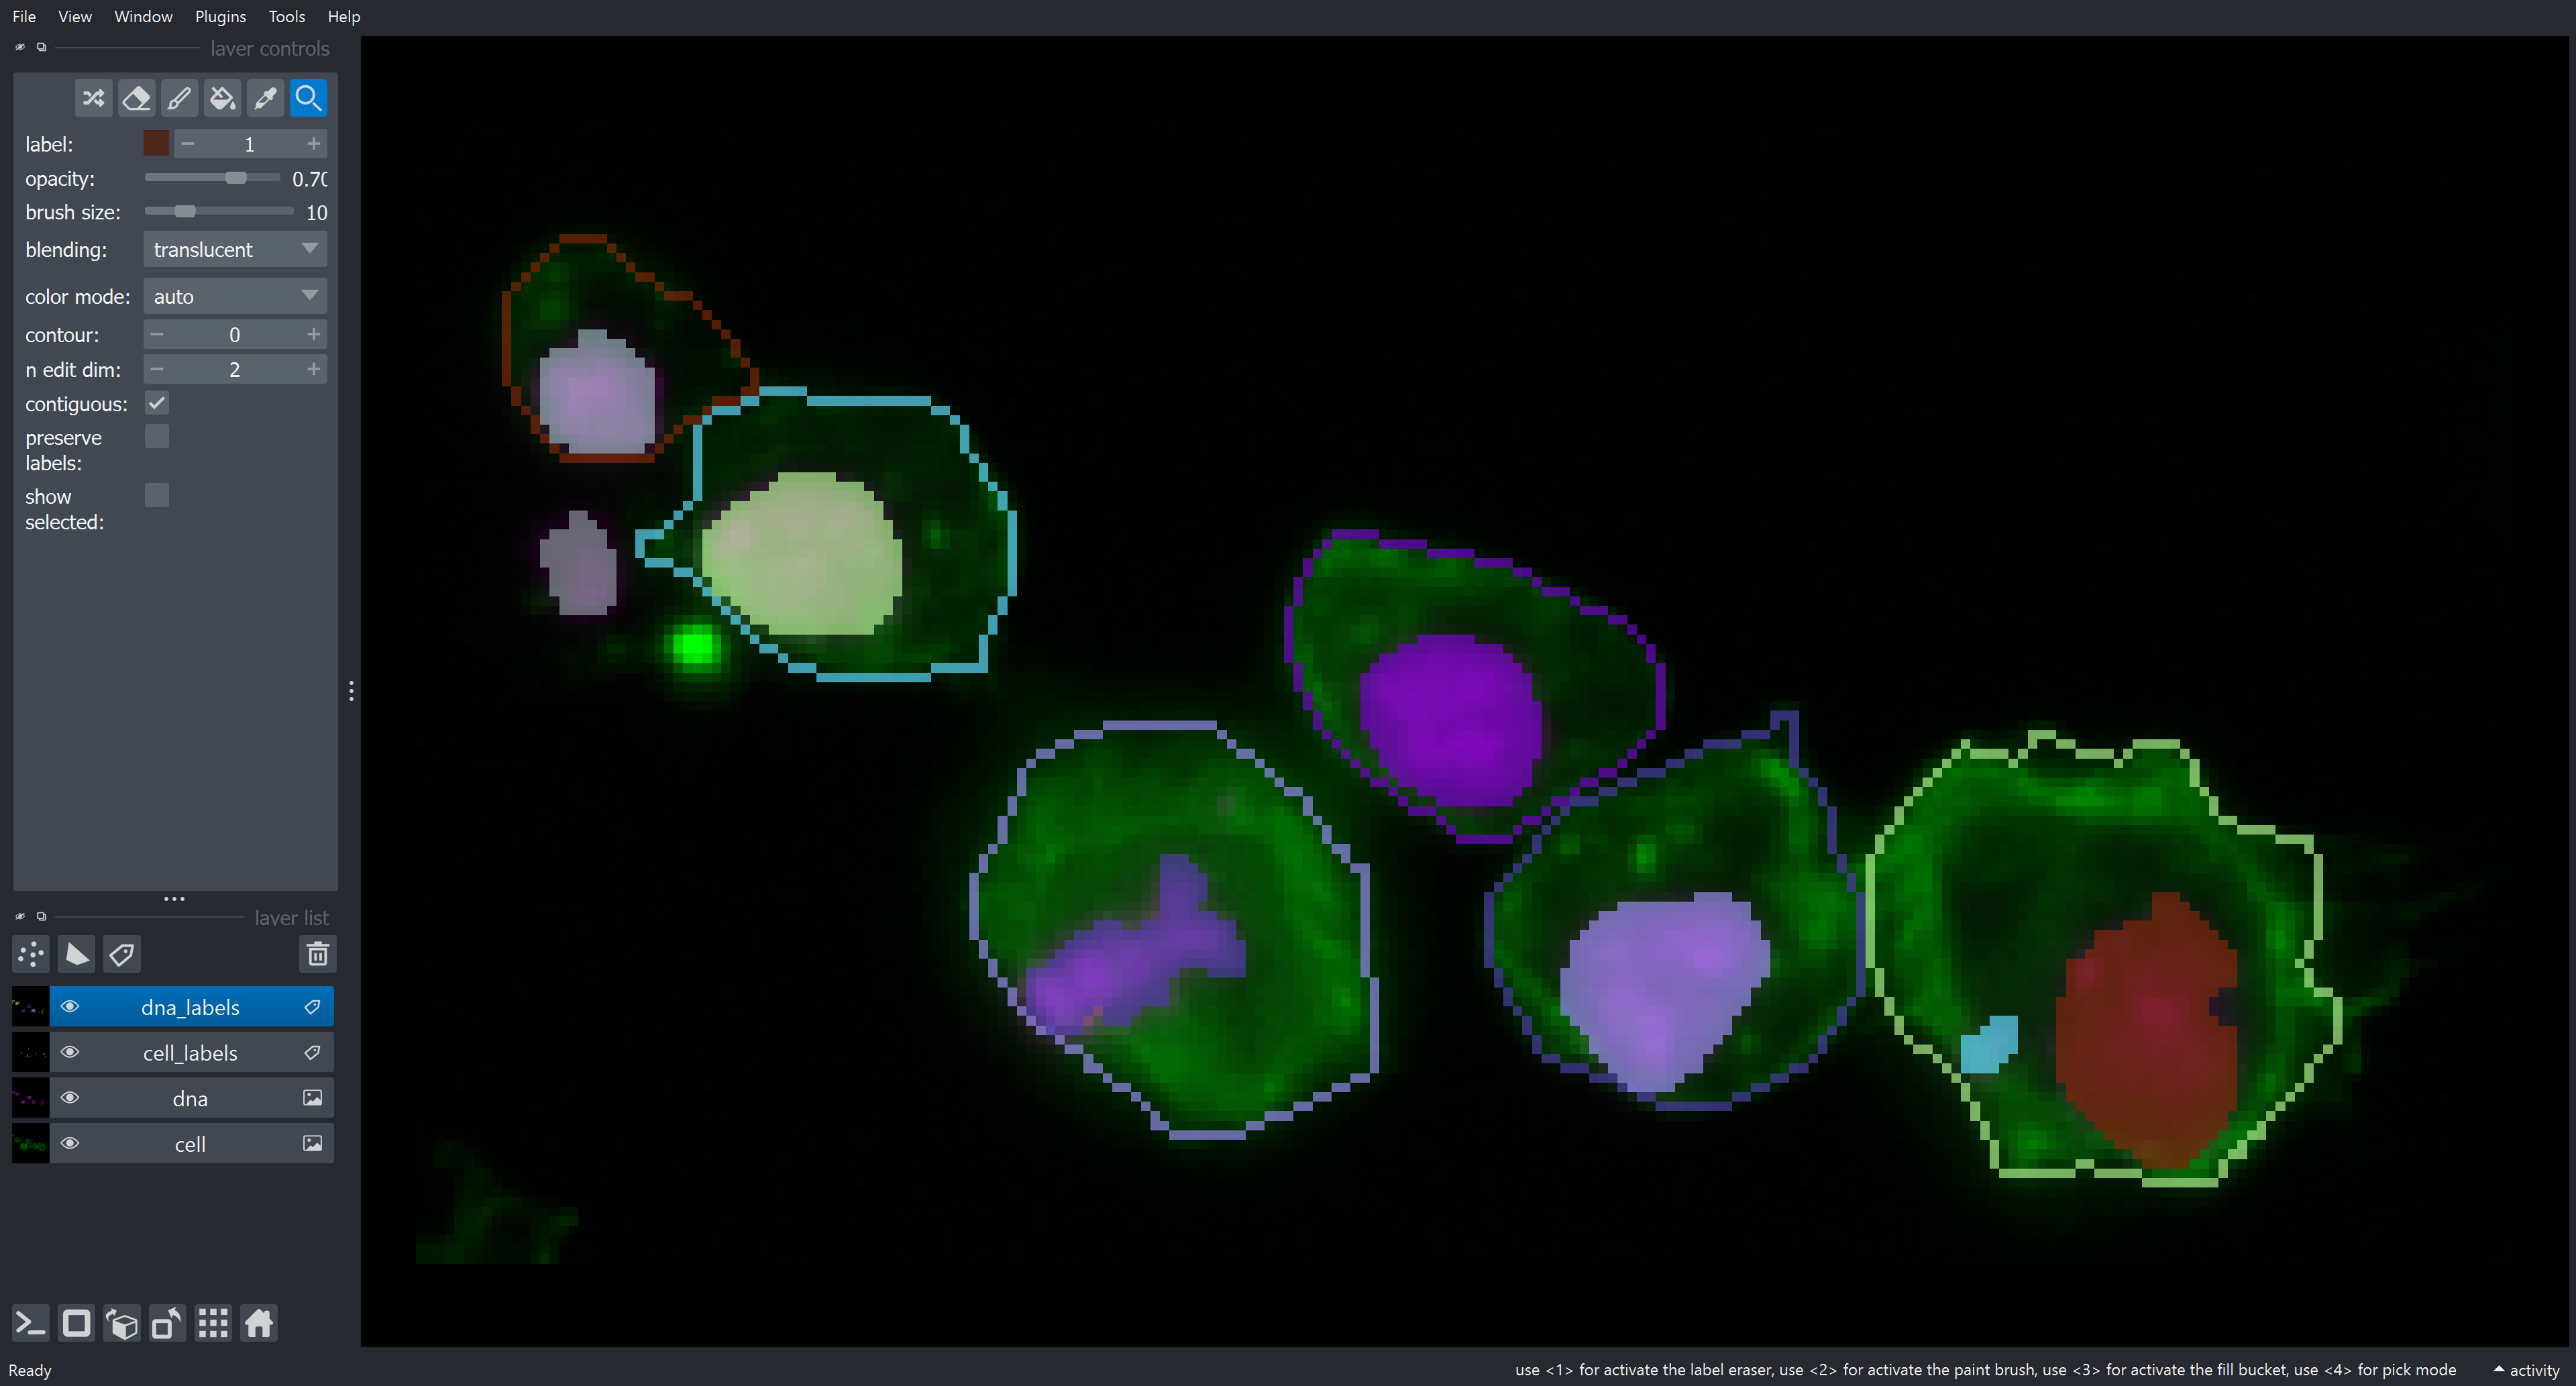

In [4]:
viewer.add_image(image_channel1, name = 'cell', colormap='green')
viewer.add_image(image_channel2, name = 'dna', colormap='magenta', blending='additive')
cell_labels_layer = viewer.add_labels(cell_labels)
cell_labels_layer.contour = 1
dna_labels_layer = viewer.add_labels(dna_labels)
nbscreenshot(viewer)

## Open the plugin
We open the plugin by the Tools menu (Tools -> Measurement tables -> Regionprops Measure Things Inside Things (scikit-image, nsr)).

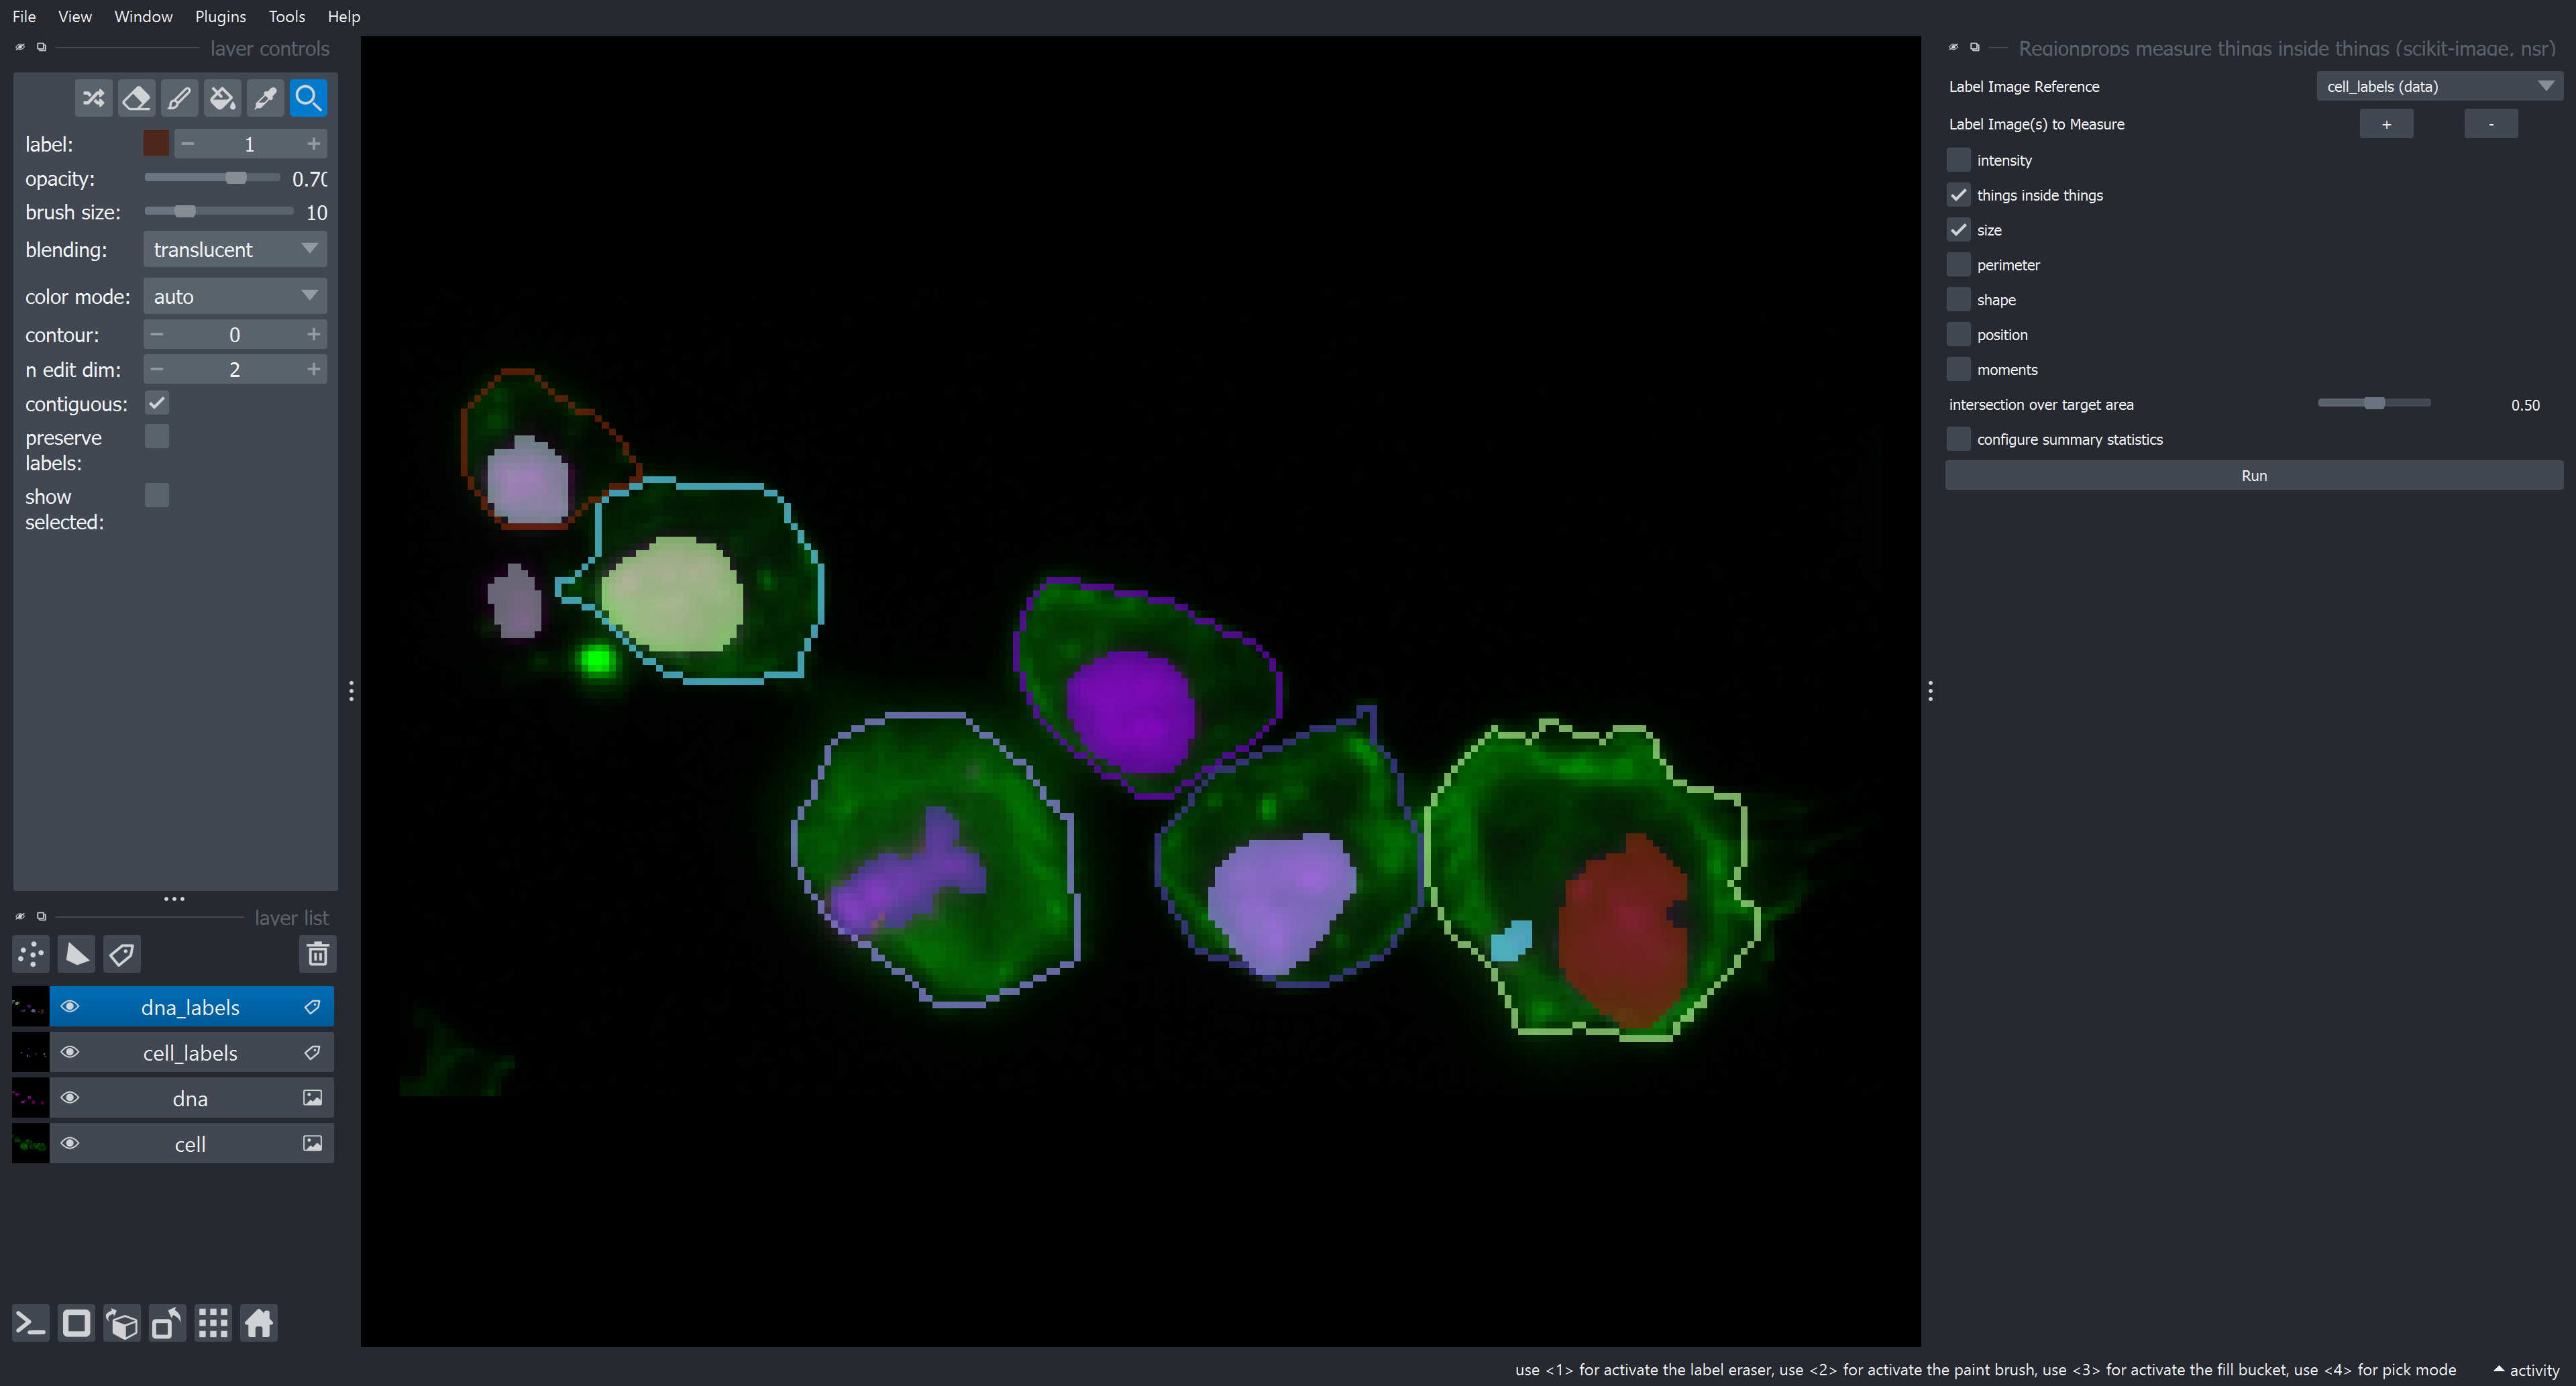

In [5]:
nbscreenshot(viewer)

## Count number of objects 'inside' objects in another channel

If we want to count how many labels from one labels layer can be considered 'inside' another labels layer, we have to:
  1. ensure the `things_inside_things` checkbox is enabled;
  2. click on the `+` button in front of `Label Image(s) to Measure`;
  3. assign the second labels layer to it (in this case, the 'dna_labels');
  4. click on `configure summary statistics`, (extra options show up, notice that `average` is enabled by default), uncheck `average` and check `count`.

It should look like this:

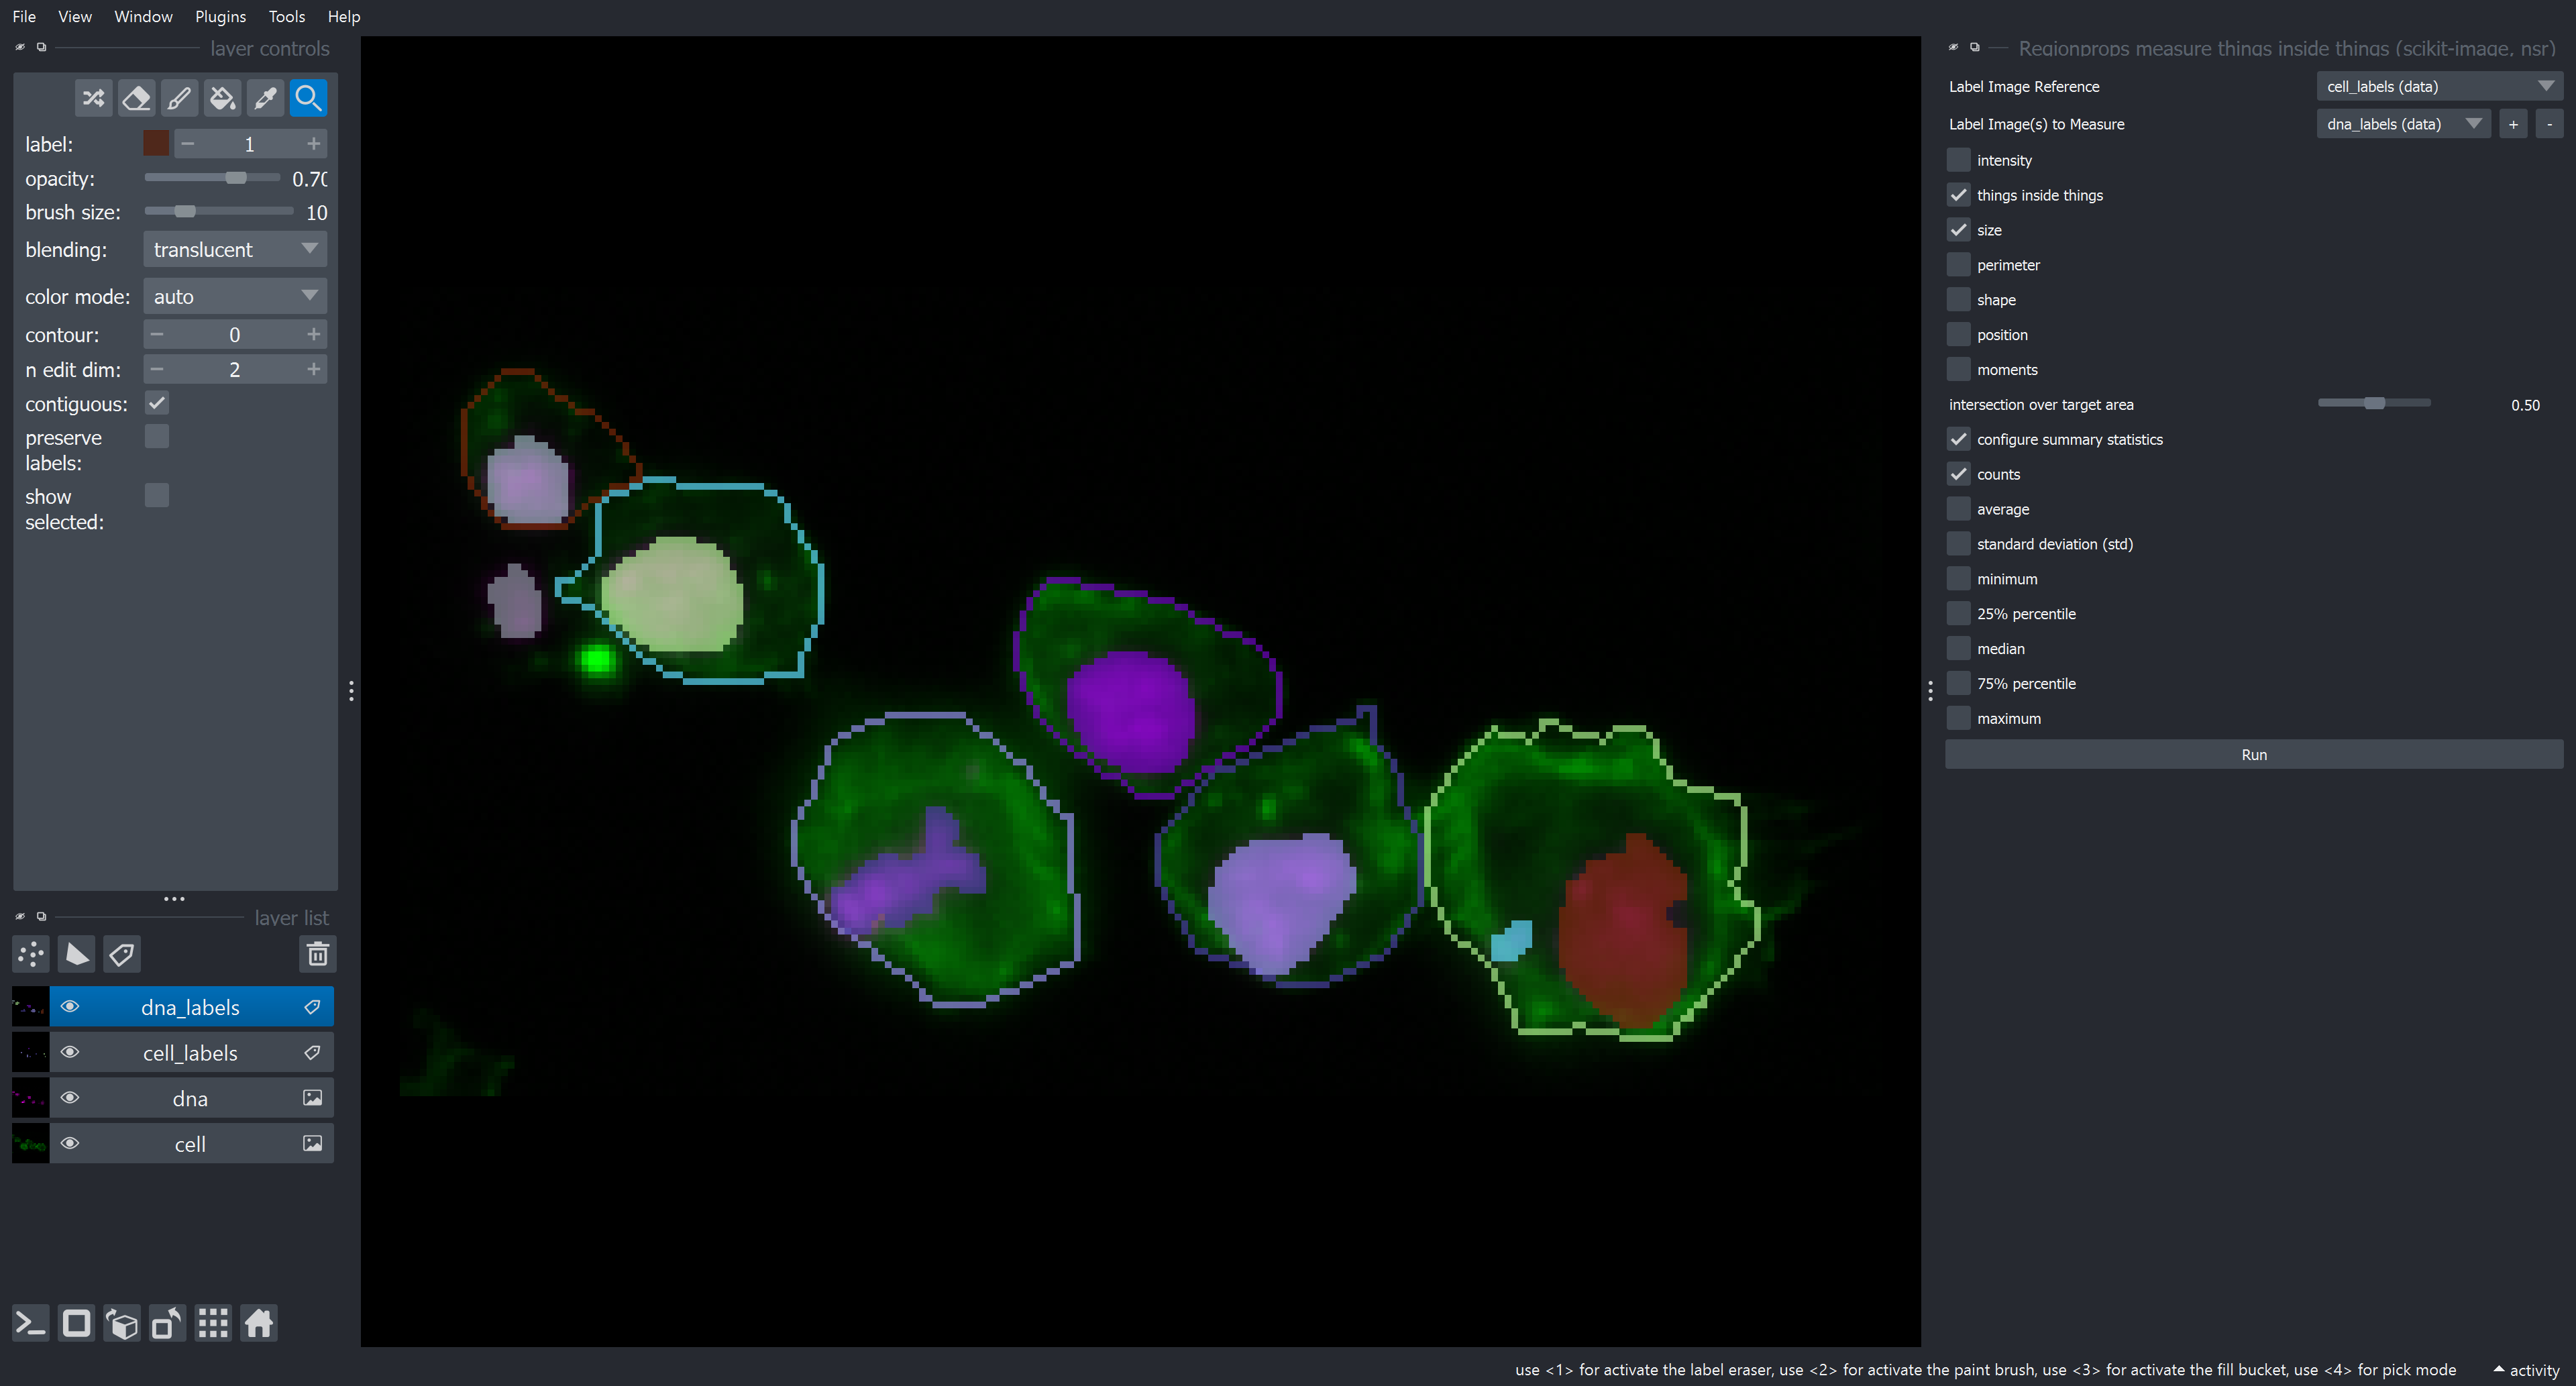

PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area']
PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area']
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


c:\users\mazo260d\documents\github\napari-skimage-regionprops\napari_skimage_regionprops\_process_tables.py:87: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  output_table = pd.merge(table_reference_labels_properties,


In [6]:
nbscreenshot(viewer)

Then hit the 'Run' button.

This returns a small table in a new tab indicating how many labels (`counts`) from the second labels layer are 'inside' the reference labels layer, i.e., how many DNA objects are inside each cell.

The row where label is `0` means background.

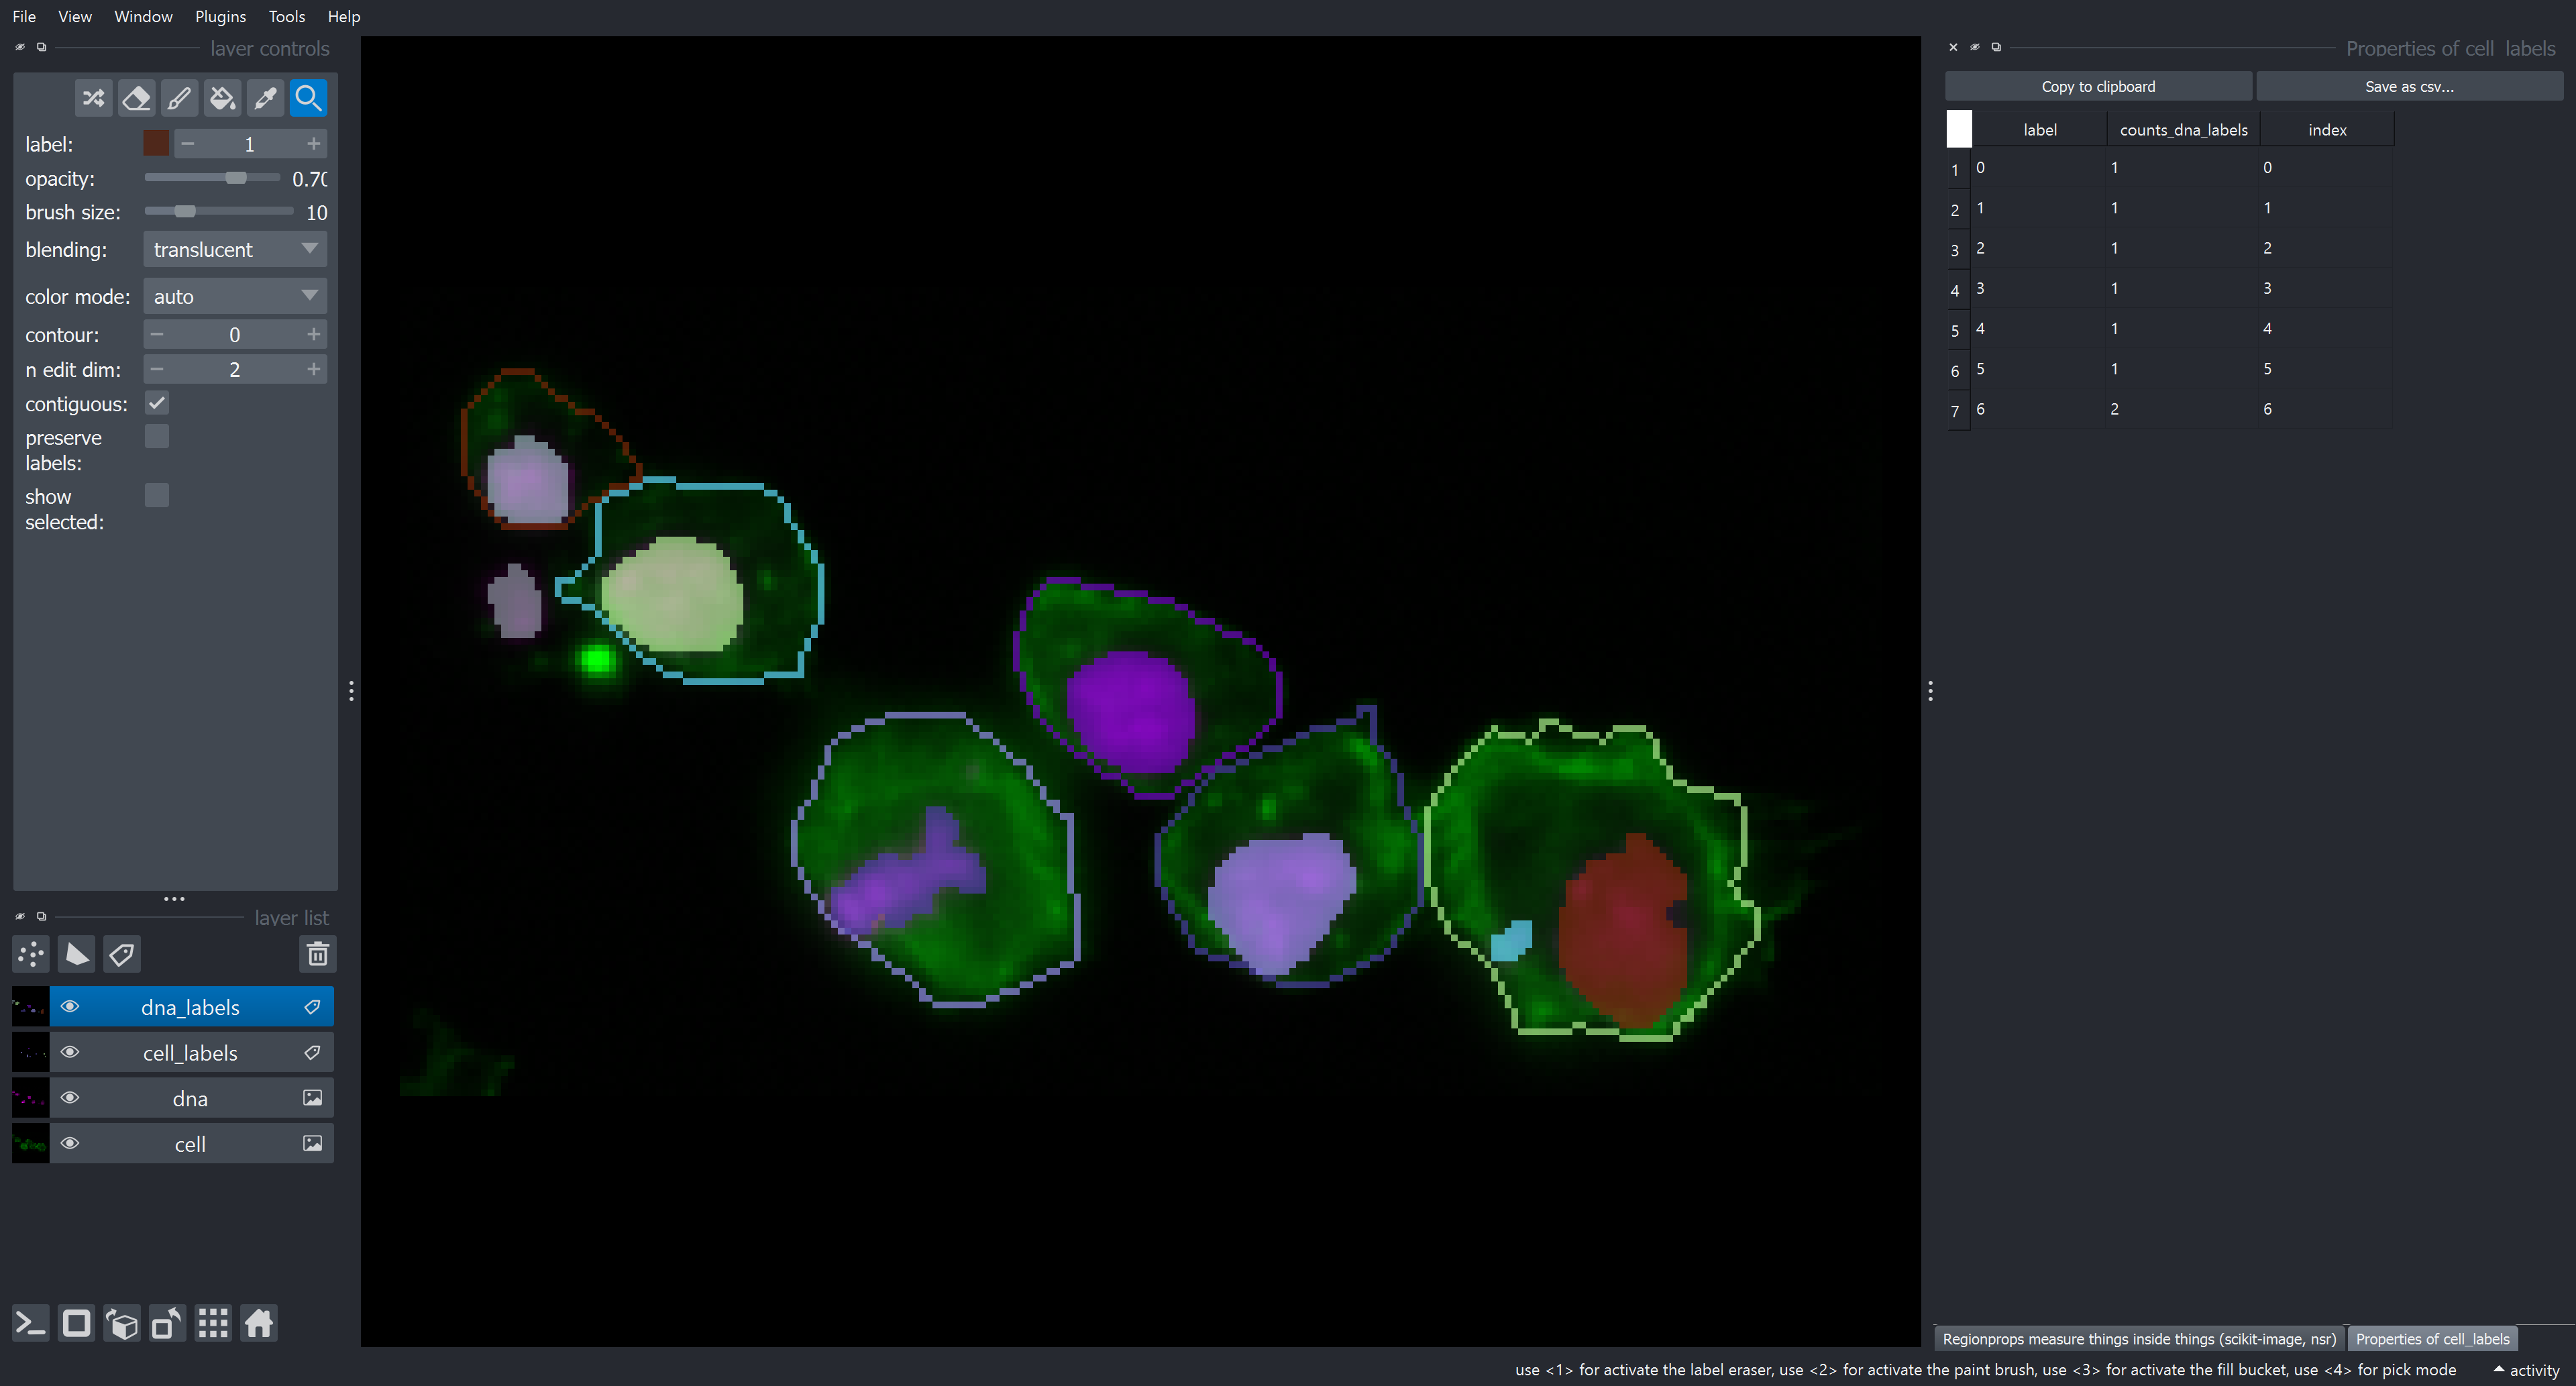

PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area']
PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area']
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


c:\users\mazo260d\documents\github\napari-skimage-regionprops\napari_skimage_regionprops\_process_tables.py:87: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  output_table = pd.merge(table_reference_labels_properties,


In [7]:
nbscreenshot(viewer)

# Get average area of objects 'inside' objects in another channel

Let's say we want to do more than count objects. We are also interested in knowing the average area of the objects that are 'inside' objects in another channel. To do that, we should:

  1. click on `configure summary statistics`, check `average`;
  2. hit the Run button.

We now get a larger table, with all the average values (related to `size`) of the objects 'inside'.

If we check other features, like `perimeter`, `shape`, `position` and `moments`, we will also get average values for each property involved in these features.

If we check other statistics, like `std`, `minimum`, etc; we will get each of these statistics for every property selected. 

*Keep in mind that the table may become **very** wide if you select everything!*

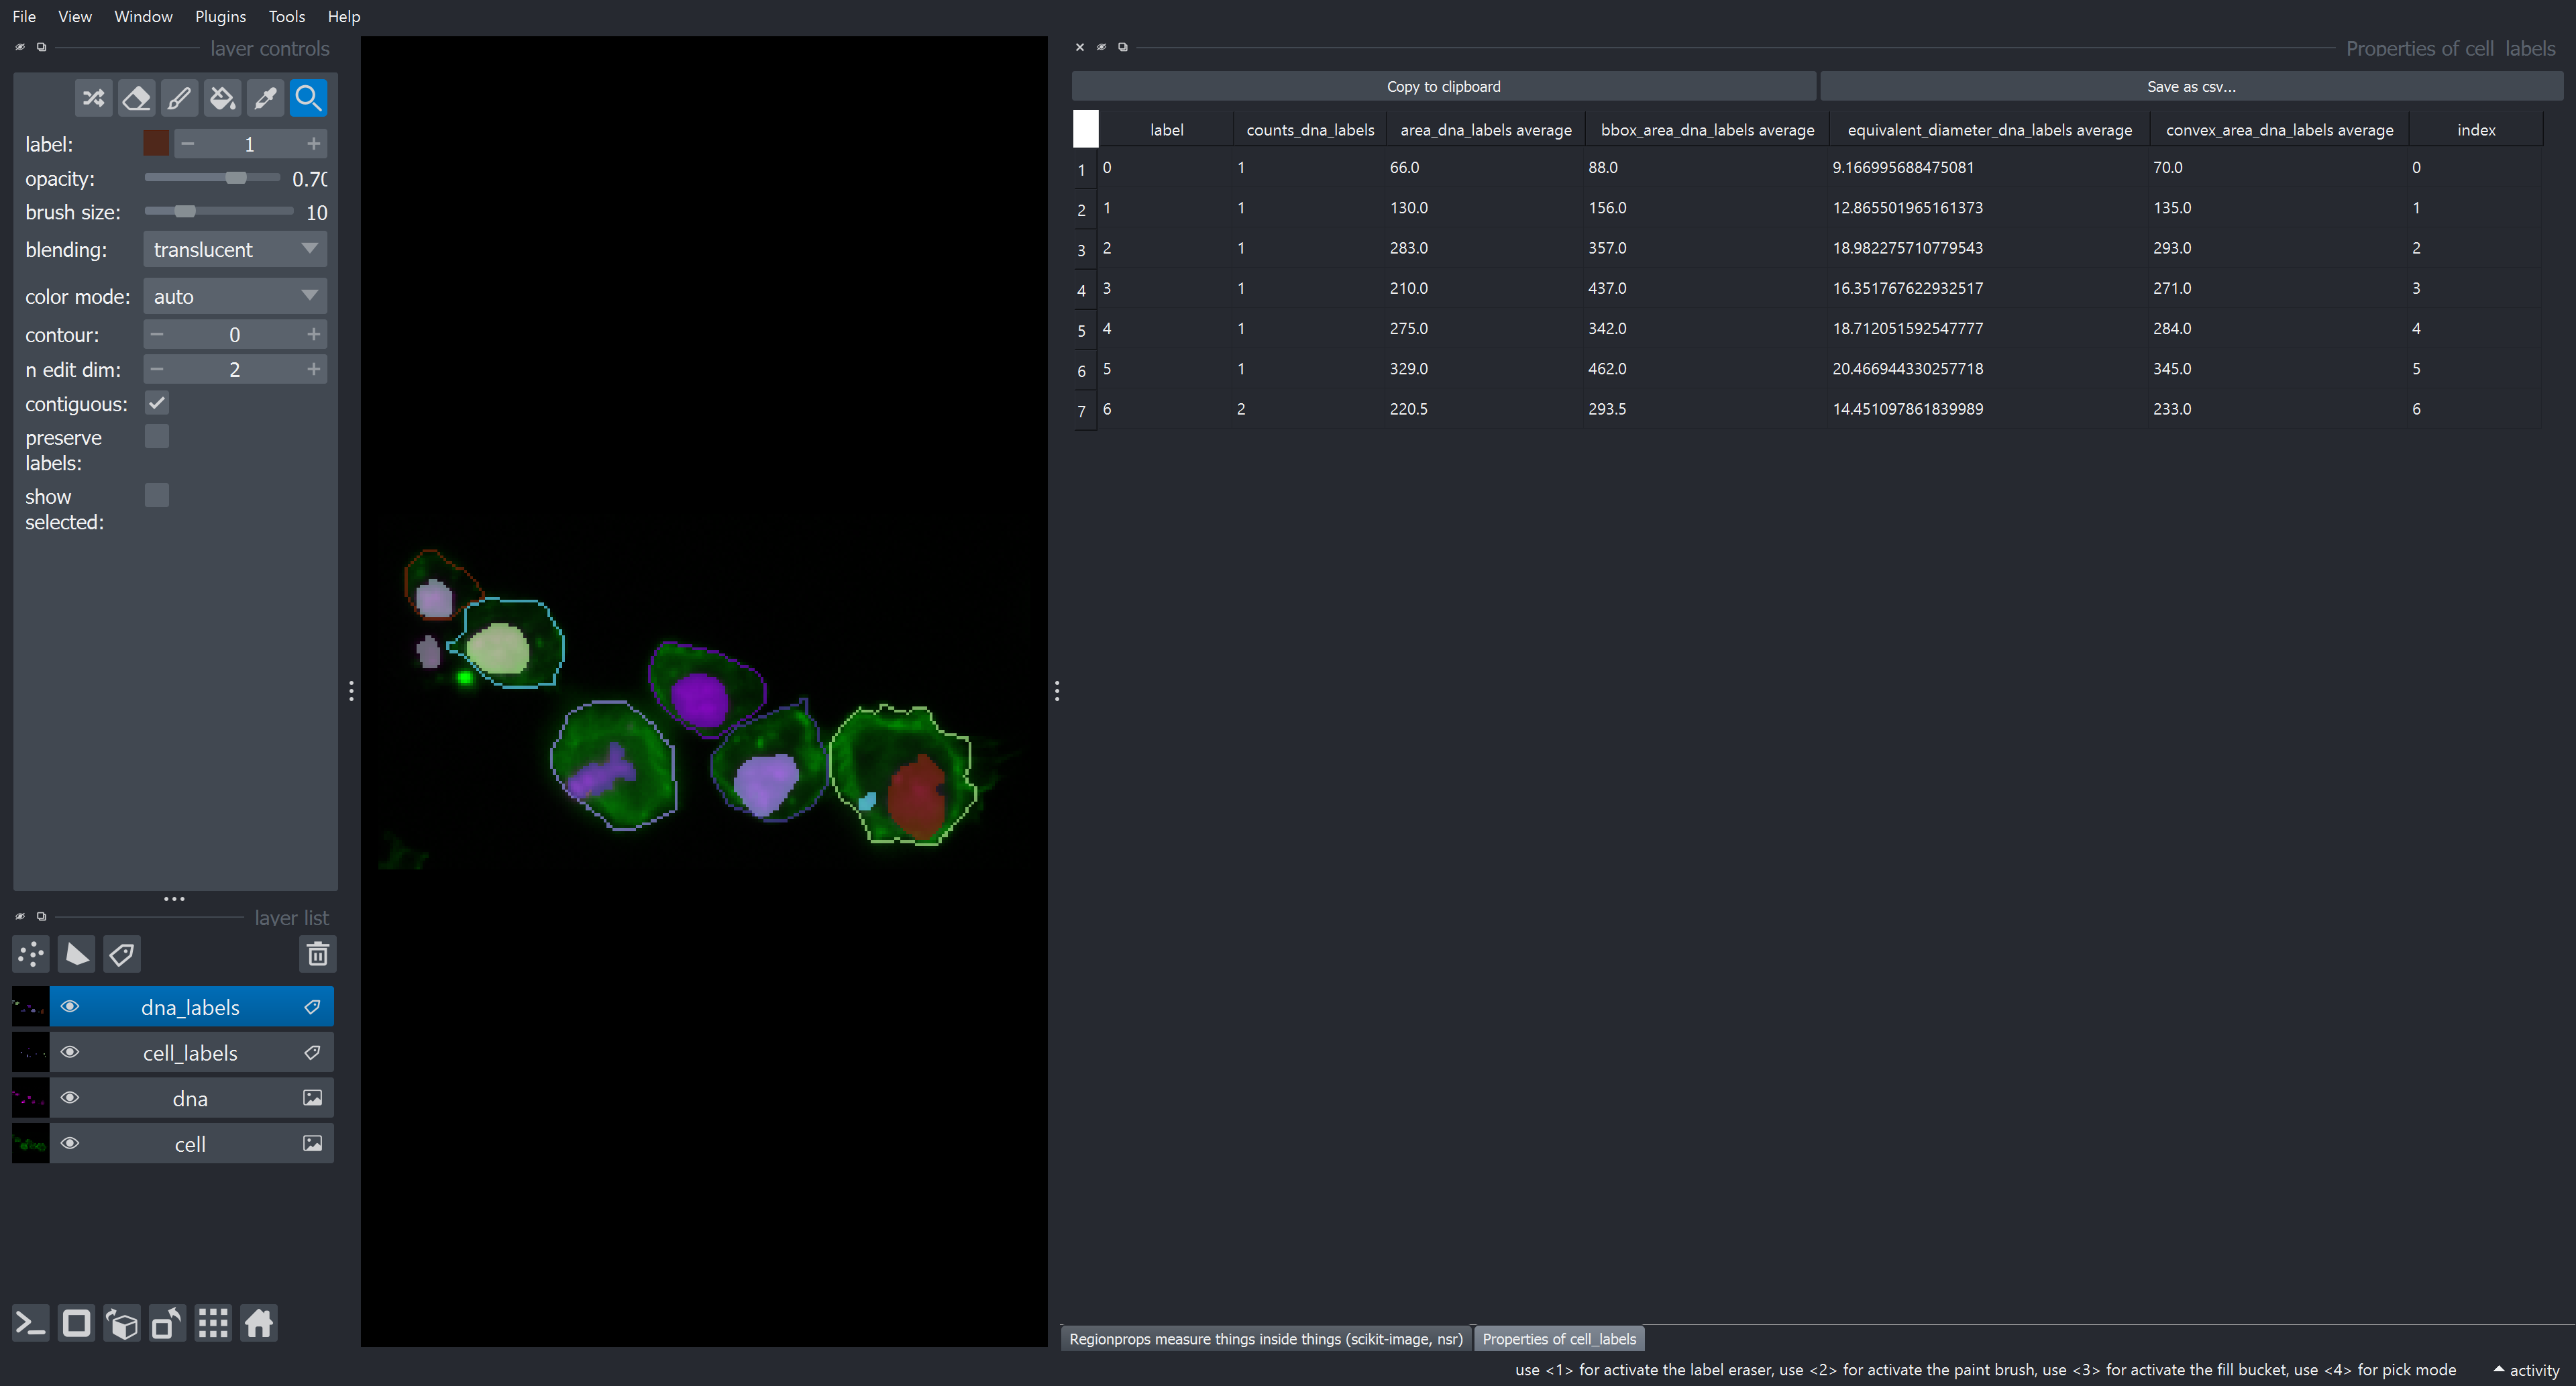

In [8]:
nbscreenshot(viewer)

## Include intensity features

We can also measure intensity features if we enable the `intensity` checkbox. Of course, we need intensity images to get these features from. Therefore, one (if `things_inside_things` if disabled) or two (if `things_inside_things` is enabled) extra inputs will be added to the interface. We should select an `Intensity Image Reference` (related to the reference labels) and, if `things_inside_things`, another `Intensity Image(s) to Measure` (related to the other labels layer).

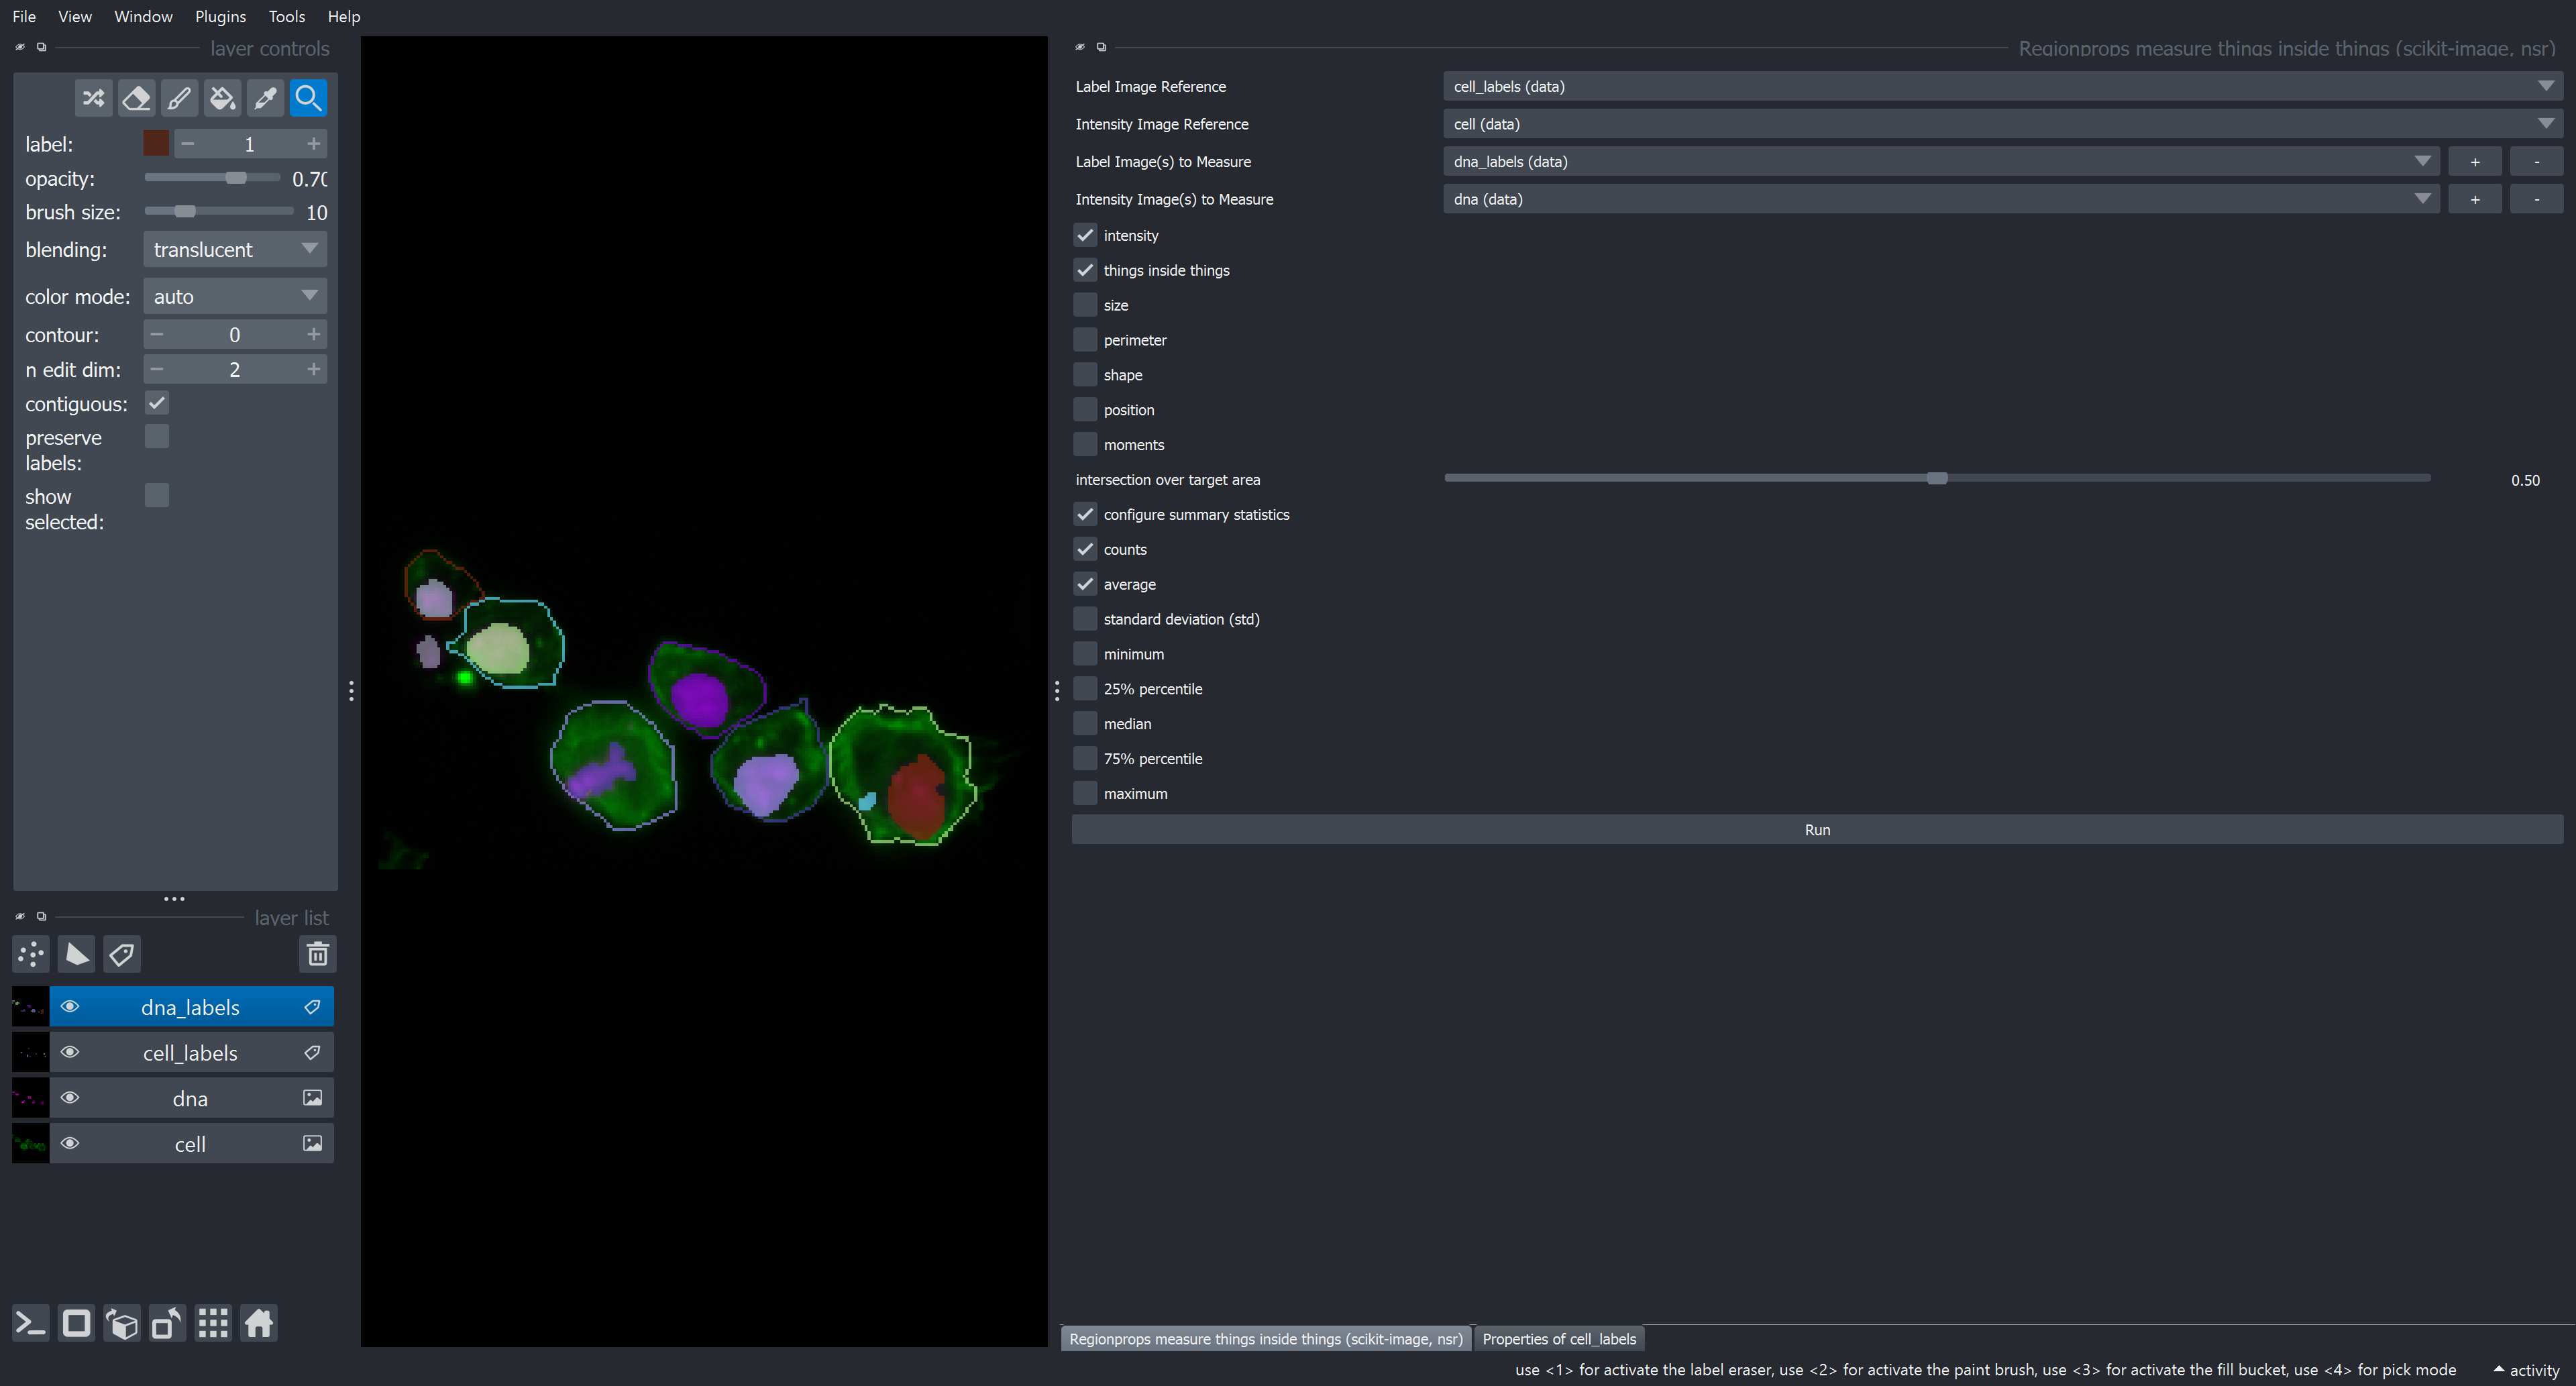

In [12]:
nbscreenshot(viewer)

By clicking on the Run button, we will now also have summary statistics of intensity features added to the table (we unchecked `size` to better display the added intensity features).

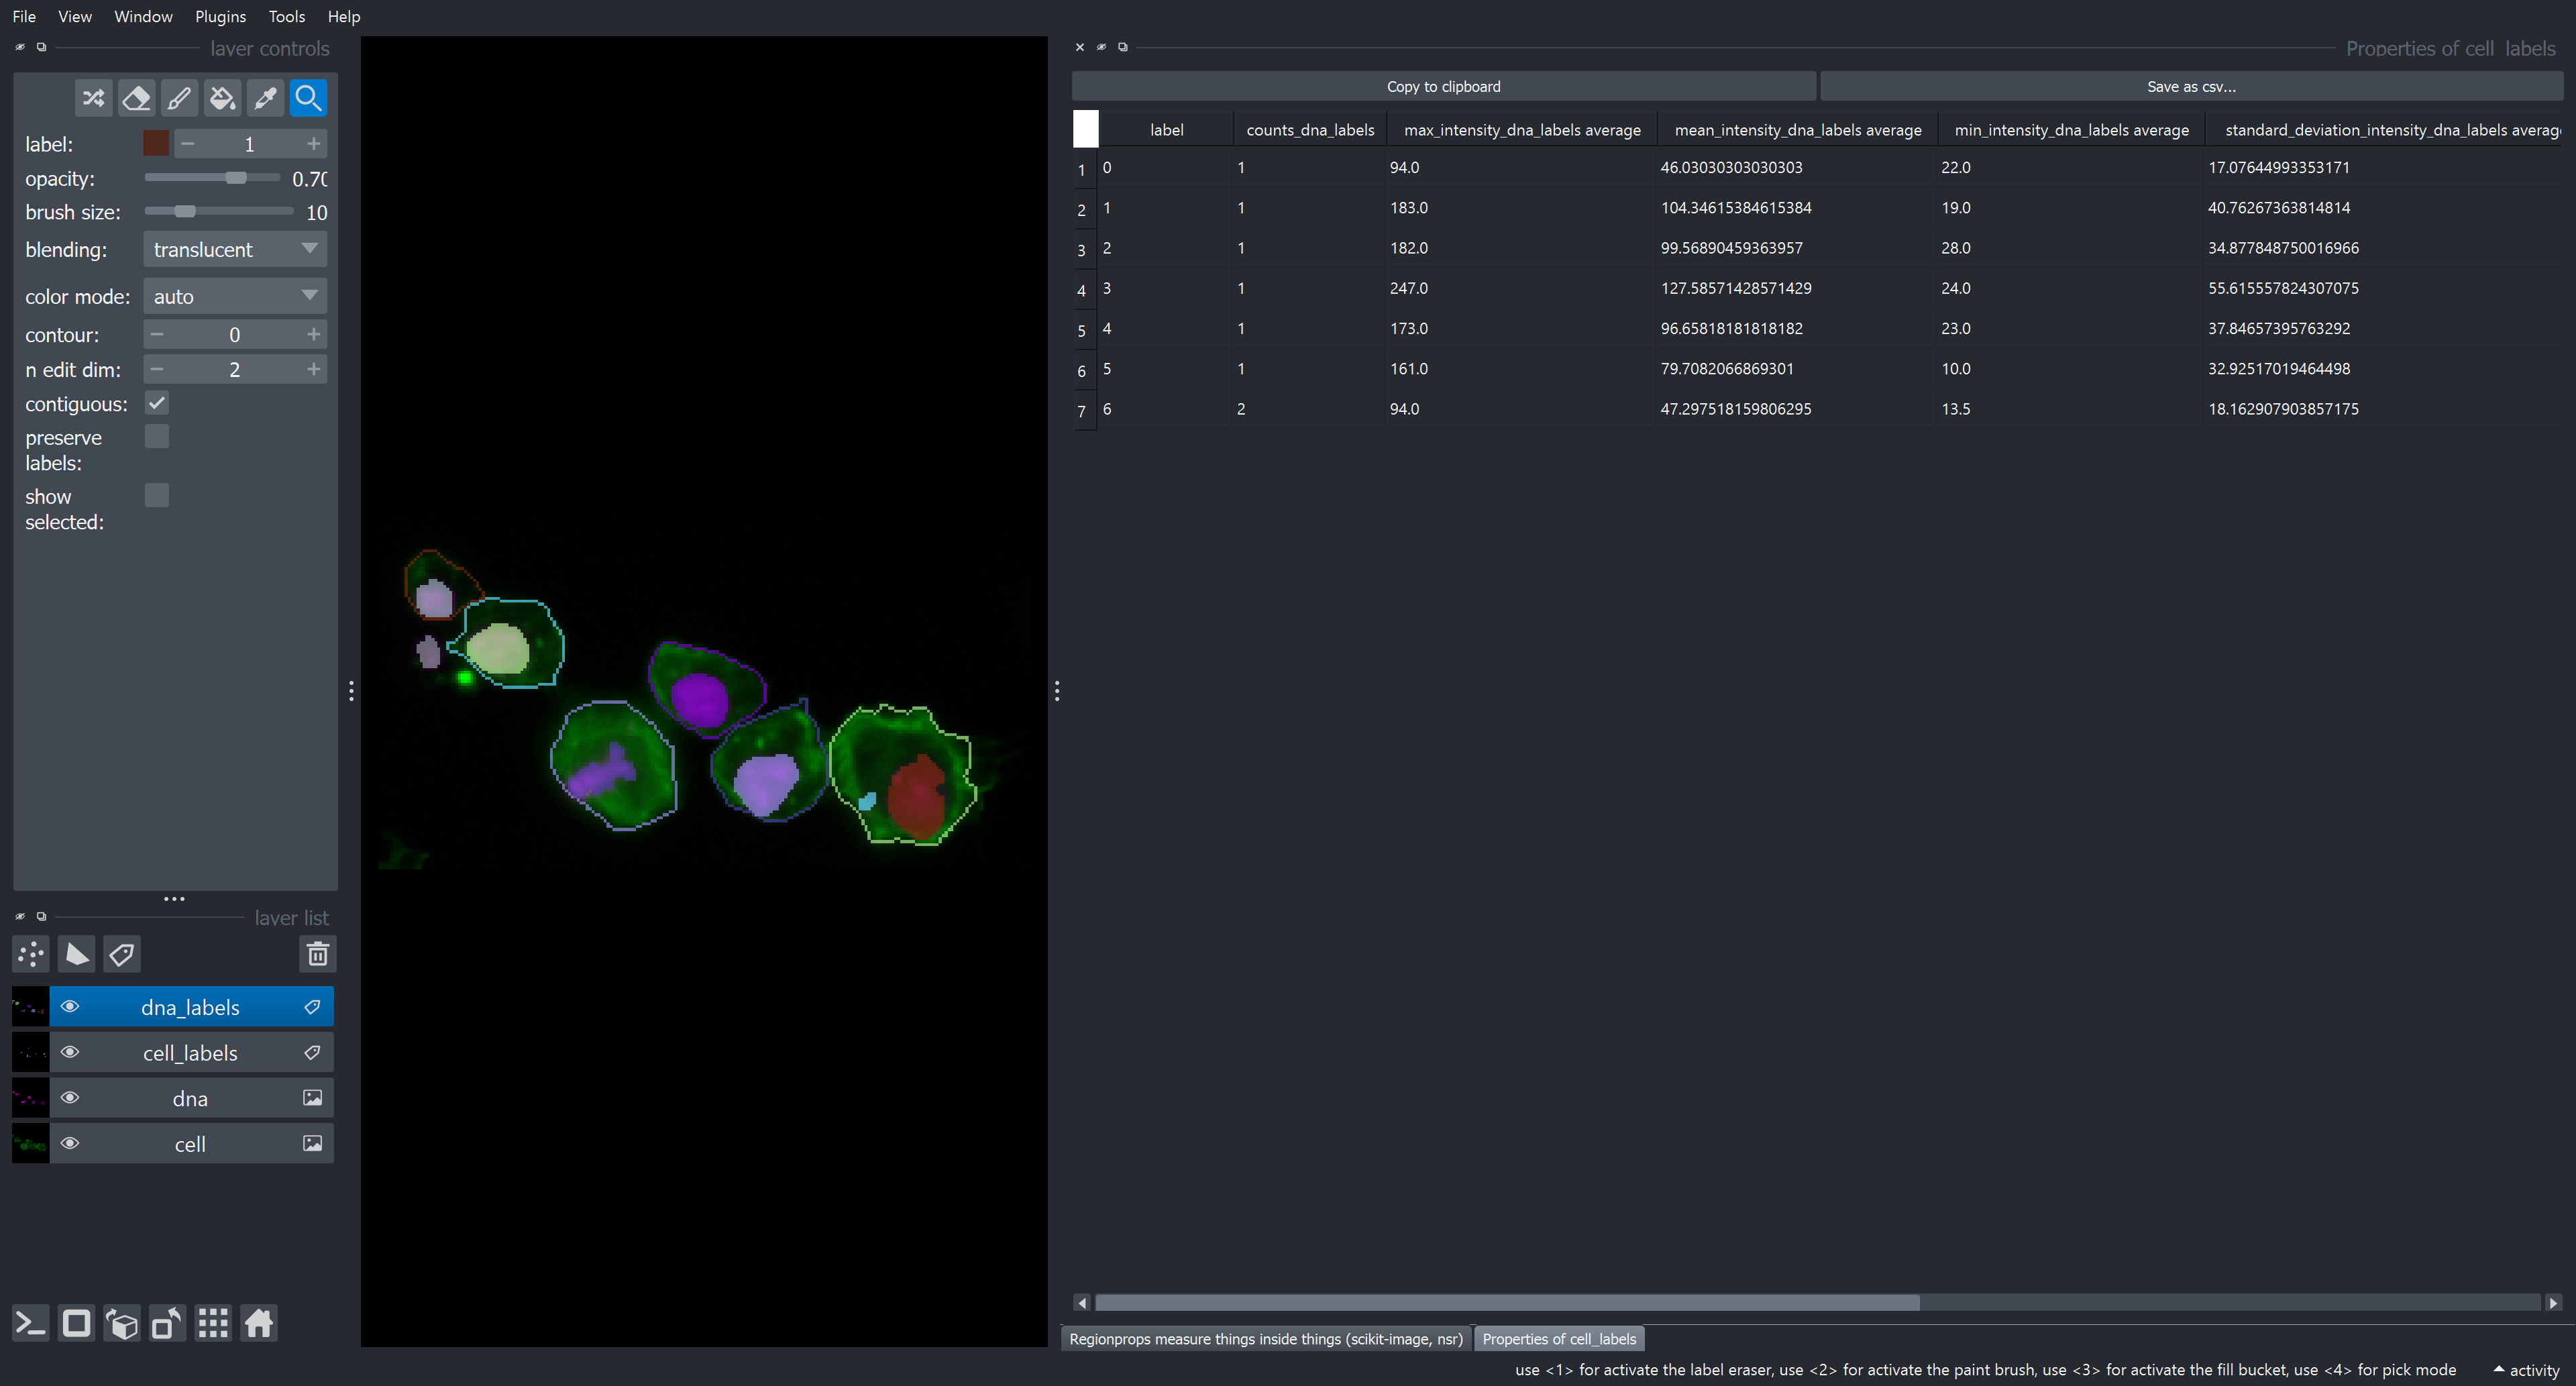

In [13]:
nbscreenshot(viewer)